In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
y_train.shape

(50000, 1)

In [5]:
y_test.shape

(10000, 1)

In [6]:
X_train , X_test = X_train / 255.0 , X_test / 255.0
y_train , y_test = y_train.flatten() , y_test.flatten()
print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)

X_train.shape : (50000, 32, 32, 3)
y_train.shape : (50000,)


In [7]:
# Number of classes
K = len(set(y_train))
print("Number of Classes :", K)

Number of Classes : 10


In [8]:
# Build the model
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 18s 6ms/step - loss: 1.7295 - accuracy: 0.4471 - val_loss: 0.9796 - val_accuracy: 0.6593
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8846 - accuracy: 0.6895 - val_loss: 0.8344 - val_accuracy: 0.7102
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6870 - accuracy: 0.7603 - val_loss: 0.7595 - val_accuracy: 0.7448
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5833 - accuracy: 0.7956 - val_loss: 0.6845 - val_accuracy: 0.7665
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4776 - accuracy: 0.8356 - val_loss: 0.6564 - val_accuracy: 0.7882
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3980 - accuracy: 0.8624 - val_loss: 0.6463 - val_accuracy: 0.7909
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3330 - accuracy: 0.8831 - val_loss: 0.6253 - val_accurac

In [10]:
# Fit with Data Augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
1563/1563 [==============================] - 32s 16ms/step - loss: 1.8094 - accuracy: 0.4103 - val_loss: 1.2012 - val_accuracy: 0.5774
Epoch 2/30
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0392 - accuracy: 0.6369 - val_loss: 0.8622 - val_accuracy: 0.7083
Epoch 3/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8595 - accuracy: 0.7063 - val_loss: 0.9829 - val_accuracy: 0.6717
Epoch 4/30
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7506 - accuracy: 0.7452 - val_loss: 0.6764 - val_accuracy: 0.7698
Epoch 5/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6847 - accuracy: 0.7657 - val_loss: 0.6550 - val_accuracy: 0.7798
Epoch 6/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6377 - accuracy: 0.7821 - val_loss: 0.6586 - val_accuracy: 0.7831
Epoch 7/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5993 - accuracy: 0.7945 - val_loss: 0.6073 -

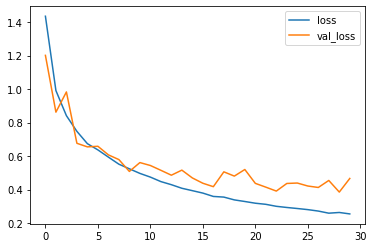

In [11]:
# Plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

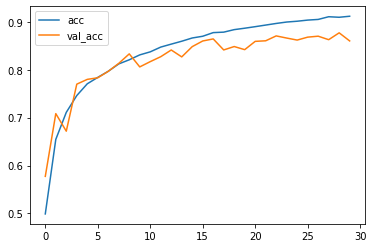

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [15]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


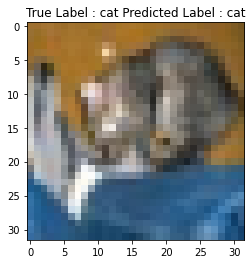

In [20]:
# Show some misclassified examples
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != X_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label : %s Predicted Label : %s" % (labels[y_test[i]], labels[p_test[i]]));

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 